# Thyroid Disease Classification Using Multi-layer Perceptron Neural Network

## Larger networks

In [2]:
# Import packages

import pandas as pd
import numpy as np
from keras.models import load_model
from pandas_ml import ConfusionMatrix
from sklearn.model_selection import KFold
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers

In [4]:
# Load the datasets.

df_train = pd.read_csv('norm-ann-train.csv')
df_test = pd.read_csv('norm-ann-test.csv')

In [5]:
# Prepare the feature and label datasets.

df_train_x = df_train.drop('class', axis=1)
df_train_y = df_train['class']

df_test_x = df_test.drop('class', axis=1)
df_test_y = df_test['class']

# convert labels to 0, 1, 2

df_train_y_rescale = df_train_y - 1
df_test_y_rescale = df_test_y - 1

np.unique(df_train_y_rescale)

array([0, 1, 2])

## Check the performance of the previous best model (64, 64, 64) on the test set.

In [3]:
# Load the final model from the previous analysis

from keras.models import load_model
model1 = load_model('mlp-imbalanced-data.h5')

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Confusion Matrix for the 1st Model
from pandas_ml import ConfusionMatrix

y_pred1 = model1.predict_classes(df_test_x)
y_pred1 += 1

confusion_matrix1 = ConfusionMatrix(df_test_y, y_pred1)

In [6]:
confusion_matrix1.print_stats()

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted   1  2     3  __all__
Actual                         
1          52  1    20       73
2           0  1   176      177
3           8  0  3170     3178
__all__    60  2  3366     3428


Overall Statistics:

Accuracy: 0.940198366394399
95% CI: (0.9317321022926887, 0.9479036869875699)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999999
Kappa: 0.33027860425311273
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         1            2           3
Population                                   3428         3428        3428
P: Condition positive                          73          177        3178
N: Condition negative                        3355         3251         250
Test outcome positive                          60            2        3366
Test outcome negative                        3368         3426          62
TP: True Positive                              52            1        3170
TN: True Negative    

## Train larger networks

In [7]:
# Set up the K fold cross validation
from sklearn.model_selection import KFold
seed = 123
np.random.seed(seed)
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [9]:
# Train a 128 x 128 x 128 network
from keras import models
from keras import layers

model2 = models.Sequential()

# 3 hidden layers 128x128x128
model2.add(layers.Dense(128, activation='relu', input_shape=(36,)))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

model2.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 18s - loss: 1.0080 - acc: 0.7109

1536/3772 [===========>..................] - ETA: 1s - loss: 0.3786 - acc: 0.9141 

3456/3772 [==========================>...] - ETA: 0s - loss: 0.3402 - acc: 0.9201

3772/3772 [==============================] - 1s 216us/step - loss: 0.3421 - acc: 0.9189 - val_loss: 0.2911 - val_acc: 0.9271


Epoch 2/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.4807 - acc: 0.8750

1408/3772 [==========>...................] - ETA: 0s - loss: 0.3020 - acc: 0.9254

3456/3772 [==========================>...] - ETA: 0s - loss: 0.2870 - acc: 0.9271

3772/3772 [==============================] - 0s 43us/step - loss: 0.2967 - acc: 0.9247 - val_loss: 0.2719 - val_acc: 0.9271


Epoch 3/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2754 - acc: 0.9297

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2887 - acc: 0.9225

3456/3772 [==========================>...] - ETA: 0s - loss: 0.2809 - acc: 0.9239

3772/3772 [==============================] - 0s 44us/step - loss: 0.2773 - acc: 0.9247 - val_loss: 0.2664 - val_acc: 0.9285


Epoch 4/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1713 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2603 - acc: 0.9290

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9315

3772/3772 [==============================] - 0s 44us/step - loss: 0.2585 - acc: 0.9274 - val_loss: 0.2475 - val_acc: 0.9297


Epoch 5/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2957 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2576 - acc: 0.9234

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2409 - acc: 0.9322

3772/3772 [==============================] - 0s 45us/step - loss: 0.2401 - acc: 0.9329 - val_loss: 0.2415 - val_acc: 0.9379


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2159 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2494 - acc: 0.9297

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2338 - acc: 0.9343

3772/3772 [==============================] - 0s 47us/step - loss: 0.2248 - acc: 0.9366 - val_loss: 0.2730 - val_acc: 0.9347


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2439 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2286 - acc: 0.9375

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2215 - acc: 0.9391

3772/3772 [==============================] - 0s 44us/step - loss: 0.2191 - acc: 0.9388 - val_loss: 0.2283 - val_acc: 0.9361


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1918 - acc: 0.9297

 896/3772 [======>.......................] - ETA: 0s - loss: 0.1861 - acc: 0.9442

2048/3772 [===============>..............] - ETA: 0s - loss: 0.1947 - acc: 0.9438

3712/3772 [============================>.] - ETA: 0s - loss: 0.2063 - acc: 0.9397

3772/3772 [==============================] - 0s 57us/step - loss: 0.2072 - acc: 0.9396 - val_loss: 0.2108 - val_acc: 0.9373


Epoch 9/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1678 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2221 - acc: 0.9347

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2121 - acc: 0.9381

3772/3772 [==============================] - 0s 48us/step - loss: 0.2042 - acc: 0.9411 - val_loss: 0.2184 - val_acc: 0.9387


Epoch 10/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1407 - acc: 0.9609

1664/3772 [============>.................] - ETA: 0s - loss: 0.1774 - acc: 0.9471

3456/3772 [==========================>...] - ETA: 0s - loss: 0.2023 - acc: 0.9416

3772/3772 [==============================] - 0s 46us/step - loss: 0.2062 - acc: 0.9403 - val_loss: 0.2007 - val_acc: 0.9393


Epoch 11/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1083 - acc: 0.9766

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1740 - acc: 0.9508

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1807 - acc: 0.9492

3772/3772 [==============================] - 0s 51us/step - loss: 0.1962 - acc: 0.9419 - val_loss: 0.2834 - val_acc: 0.9352


Epoch 12/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3361 - acc: 0.9141

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2044 - acc: 0.9401

2304/3772 [=================>............] - ETA: 0s - loss: 0.2026 - acc: 0.9397

3772/3772 [==============================] - 0s 51us/step - loss: 0.1935 - acc: 0.9425 - val_loss: 0.2208 - val_acc: 0.9376


Epoch 13/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2135 - acc: 0.9531

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1892 - acc: 0.9521

2304/3772 [=================>............] - ETA: 0s - loss: 0.1958 - acc: 0.9466

3772/3772 [==============================] - 0s 53us/step - loss: 0.1967 - acc: 0.9433 - val_loss: 0.2063 - val_acc: 0.9376


Epoch 14/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1983 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1932 - acc: 0.9447

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2043 - acc: 0.9416

3772/3772 [==============================] - 0s 46us/step - loss: 0.1946 - acc: 0.9433 - val_loss: 0.1983 - val_acc: 0.9396


Epoch 15/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2144 - acc: 0.9375

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2053 - acc: 0.9395

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1881 - acc: 0.9417

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1911 - acc: 0.9426

3772/3772 [==============================] - 0s 68us/step - loss: 0.1859 - acc: 0.9441 - val_loss: 0.1937 - val_acc: 0.9390


Epoch 16/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1141 - acc: 0.9766

2048/3772 [===============>..............] - ETA: 0s - loss: 0.1967 - acc: 0.9395

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1891 - acc: 0.9426

3772/3772 [==============================] - 0s 51us/step - loss: 0.1880 - acc: 0.9433 - val_loss: 0.2499 - val_acc: 0.9390


Epoch 17/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3363 - acc: 0.9141

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1877 - acc: 0.9460

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1887 - acc: 0.9444

3772/3772 [==============================] - 0s 54us/step - loss: 0.1885 - acc: 0.9449 - val_loss: 0.2312 - val_acc: 0.9387


Epoch 18/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2290 - acc: 0.9375



1024/3772 [=======>......................] - ETA: 0s - loss: 0.2068 - acc: 0.9336

1664/3772 [============>.................] - ETA: 0s - loss: 0.1977 - acc: 0.9387

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1891 - acc: 0.9412

3712/3772 [============================>.] - ETA: 0s - loss: 0.1828 - acc: 0.9432

3772/3772 [==============================] - 0s 82us/step - loss: 0.1827 - acc: 0.9430 - val_loss: 0.1915 - val_acc: 0.9402


Epoch 19/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1138 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1888 - acc: 0.9479

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1822 - acc: 0.9474

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1832 - acc: 0.9457

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1823 - acc: 0.9453

3772/3772 [==============================] - 0s 88us/step - loss: 0.1816 - acc: 0.9449 - val_loss: 0.2014 - val_acc: 0.9370


Epoch 20/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1332 - acc: 0.9766

 896/3772 [======>.......................] - ETA: 0s - loss: 0.1961 - acc: 0.9397

1664/3772 [============>.................] - ETA: 0s - loss: 0.1840 - acc: 0.9405

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1881 - acc: 0.9401

3712/3772 [============================>.] - ETA: 0s - loss: 0.1834 - acc: 0.9426

3772/3772 [==============================] - 0s 87us/step - loss: 0.1834 - acc: 0.9427 - val_loss: 0.1955 - val_acc: 0.9384


Epoch 21/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1671 - acc: 0.9453

 896/3772 [======>.......................] - ETA: 0s - loss: 0.2054 - acc: 0.9397

1664/3772 [============>.................] - ETA: 0s - loss: 0.1800 - acc: 0.9453

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1837 - acc: 0.9449

3456/3772 [==========================>...] - ETA: 0s - loss: 0.1853 - acc: 0.9442

3772/3772 [==============================] - 0s 96us/step - loss: 0.1811 - acc: 0.9459 - val_loss: 0.1892 - val_acc: 0.9396


Epoch 22/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1793 - acc: 0.9297

 768/3772 [=====>........................] - ETA: 0s - loss: 0.1817 - acc: 0.9414

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1766 - acc: 0.9436

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1648 - acc: 0.9474

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1794 - acc: 0.9411

3772/3772 [==============================] - 0s 83us/step - loss: 0.1805 - acc: 0.9425 - val_loss: 0.2209 - val_acc: 0.9370


Epoch 23/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1912 - acc: 0.9688

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1526 - acc: 0.9580

2176/3772 [================>.............] - ETA: 0s - loss: 0.1762 - acc: 0.9476

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1891 - acc: 0.9427

3772/3772 [==============================] - 0s 79us/step - loss: 0.1794 - acc: 0.9449 - val_loss: 0.1941 - val_acc: 0.9402


Epoch 24/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1570 - acc: 0.9531

 896/3772 [======>.......................] - ETA: 0s - loss: 0.1807 - acc: 0.9442

1792/3772 [=============>................] - ETA: 0s - loss: 0.1870 - acc: 0.9431

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1793 - acc: 0.9457

3712/3772 [============================>.] - ETA: 0s - loss: 0.1840 - acc: 0.9448

3772/3772 [==============================] - 0s 81us/step - loss: 0.1846 - acc: 0.9446 - val_loss: 0.1871 - val_acc: 0.9402


Epoch 25/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1309 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1714 - acc: 0.9437

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1842 - acc: 0.9412

3772/3772 [==============================] - 0s 52us/step - loss: 0.1687 - acc: 0.9467 - val_loss: 0.2835 - val_acc: 0.9384


Epoch 26/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1983 - acc: 0.9609

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1772 - acc: 0.9510

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1802 - acc: 0.9475

3772/3772 [==============================] - 0s 55us/step - loss: 0.1733 - acc: 0.9480 - val_loss: 0.4563 - val_acc: 0.8229


Epoch 27/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.5062 - acc: 0.7500

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2440 - acc: 0.9149

2048/3772 [===============>..............] - ETA: 0s - loss: 0.1986 - acc: 0.9341

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1829 - acc: 0.9405

3772/3772 [==============================] - 0s 63us/step - loss: 0.1815 - acc: 0.9411 - val_loss: 0.2204 - val_acc: 0.9396


Epoch 28/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1010 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1442 - acc: 0.9555

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1549 - acc: 0.9524

3772/3772 [==============================] - 0s 49us/step - loss: 0.1650 - acc: 0.9483 - val_loss: 0.2060 - val_acc: 0.9396


Epoch 29/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2121 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1673 - acc: 0.9492

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1594 - acc: 0.9490

3772/3772 [==============================] - 0s 49us/step - loss: 0.1669 - acc: 0.9457 - val_loss: 0.2549 - val_acc: 0.9204


Epoch 30/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2622 - acc: 0.8984

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1633 - acc: 0.9466

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1646 - acc: 0.9466

3772/3772 [==============================] - 0s 48us/step - loss: 0.1705 - acc: 0.9454 - val_loss: 0.1958 - val_acc: 0.9376


Epoch 31/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1448 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1554 - acc: 0.9524

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1497 - acc: 0.9528

3772/3772 [==============================] - 0s 55us/step - loss: 0.1659 - acc: 0.9462 - val_loss: 0.1966 - val_acc: 0.9341


Epoch 32/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1582 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1680 - acc: 0.9453

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1577 - acc: 0.9535

3772/3772 [==============================] - 0s 54us/step - loss: 0.1590 - acc: 0.9504 - val_loss: 0.1808 - val_acc: 0.9408


Epoch 33/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0827 - acc: 0.9844

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1618 - acc: 0.9531

2304/3772 [=================>............] - ETA: 0s - loss: 0.1580 - acc: 0.9544

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1671 - acc: 0.9501

3772/3772 [==============================] - 0s 63us/step - loss: 0.1652 - acc: 0.9507 - val_loss: 0.1816 - val_acc: 0.9419


Epoch 34/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1802 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2030 - acc: 0.9313

2176/3772 [================>.............] - ETA: 0s - loss: 0.1735 - acc: 0.9426

3456/3772 [==========================>...] - ETA: 0s - loss: 0.1570 - acc: 0.9494

3772/3772 [==============================] - 0s 84us/step - loss: 0.1564 - acc: 0.9496 - val_loss: 0.2197 - val_acc: 0.9411


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1804 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1682 - acc: 0.9514

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1590 - acc: 0.9521

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1615 - acc: 0.9513

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1593 - acc: 0.9495

3772/3772 [==============================] - 0s 95us/step - loss: 0.1570 - acc: 0.9507 - val_loss: 0.1912 - val_acc: 0.9411


Epoch 36/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1180 - acc: 0.9609

 640/3772 [====>.........................] - ETA: 0s - loss: 0.1280 - acc: 0.9563

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1718 - acc: 0.9500

2048/3772 [===============>..............] - ETA: 0s - loss: 0.1647 - acc: 0.9502

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1588 - acc: 0.9512

3772/3772 [==============================] - 0s 86us/step - loss: 0.1577 - acc: 0.9517 - val_loss: 0.1826 - val_acc: 0.9411


Epoch 37/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1301 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1727 - acc: 0.9492

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1596 - acc: 0.9516

3772/3772 [==============================] - 0s 51us/step - loss: 0.1650 - acc: 0.9486 - val_loss: 0.1846 - val_acc: 0.9379


Epoch 38/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0991 - acc: 0.9922

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1535 - acc: 0.9499

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1455 - acc: 0.9518

3772/3772 [==============================] - 0s 46us/step - loss: 0.1529 - acc: 0.9502 - val_loss: 0.1803 - val_acc: 0.9419


Epoch 39/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0960 - acc: 0.9766

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1534 - acc: 0.9505

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1557 - acc: 0.9504

3772/3772 [==============================] - 0s 48us/step - loss: 0.1561 - acc: 0.9512 - val_loss: 0.1833 - val_acc: 0.9425


Epoch 40/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1753 - acc: 0.9453

1664/3772 [============>.................] - ETA: 0s - loss: 0.1453 - acc: 0.9555

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1532 - acc: 0.9517

3772/3772 [==============================] - 0s 44us/step - loss: 0.1534 - acc: 0.9515 - val_loss: 0.1855 - val_acc: 0.9425


Epoch 41/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0610 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1357 - acc: 0.9547

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1469 - acc: 0.9531

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1578 - acc: 0.9501

3772/3772 [==============================] - 0s 61us/step - loss: 0.1546 - acc: 0.9512 - val_loss: 0.1818 - val_acc: 0.9431


Epoch 42/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1514 - acc: 0.9375

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1731 - acc: 0.9463

2176/3772 [================>.............] - ETA: 0s - loss: 0.1538 - acc: 0.9508

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1523 - acc: 0.9512

3772/3772 [==============================] - 0s 62us/step - loss: 0.1495 - acc: 0.9523 - val_loss: 0.1813 - val_acc: 0.9431


Epoch 43/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1199 - acc: 0.9688

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1410 - acc: 0.9561

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1518 - acc: 0.9516

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1503 - acc: 0.9522

3772/3772 [==============================] - 0s 63us/step - loss: 0.1498 - acc: 0.9531 - val_loss: 0.2313 - val_acc: 0.9177


Epoch 44/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1837 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1449 - acc: 0.9523

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1411 - acc: 0.9549

3772/3772 [==============================] - 0s 52us/step - loss: 0.1547 - acc: 0.9520 - val_loss: 0.1780 - val_acc: 0.9382


Epoch 45/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1326 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1390 - acc: 0.9553

2304/3772 [=================>............] - ETA: 0s - loss: 0.1439 - acc: 0.9536

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1414 - acc: 0.9531

3772/3772 [==============================] - 0s 69us/step - loss: 0.1434 - acc: 0.9528 - val_loss: 0.1918 - val_acc: 0.9443


Epoch 46/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1141 - acc: 0.9688

 640/3772 [====>.........................] - ETA: 0s - loss: 0.1245 - acc: 0.9578

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1338 - acc: 0.9570

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1438 - acc: 0.9538

3772/3772 [==============================] - 0s 65us/step - loss: 0.1453 - acc: 0.9547 - val_loss: 0.1680 - val_acc: 0.9443


Epoch 47/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0992 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1361 - acc: 0.9583

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1446 - acc: 0.9552

3772/3772 [==============================] - 0s 49us/step - loss: 0.1479 - acc: 0.9541 - val_loss: 0.1657 - val_acc: 0.9452


Epoch 48/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1345 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1391 - acc: 0.9560

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1433 - acc: 0.9538

3772/3772 [==============================] - 0s 49us/step - loss: 0.1545 - acc: 0.9496 - val_loss: 0.1677 - val_acc: 0.9452


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1202 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1347 - acc: 0.9518

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1242 - acc: 0.9575

3772/3772 [==============================] - 0s 47us/step - loss: 0.1303 - acc: 0.9568 - val_loss: 0.1989 - val_acc: 0.9443


Epoch 50/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3049 - acc: 0.8984

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1610 - acc: 0.9375

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1483 - acc: 0.9460

3772/3772 [==============================] - 0s 48us/step - loss: 0.1486 - acc: 0.9478 - val_loss: 0.1625 - val_acc: 0.9446


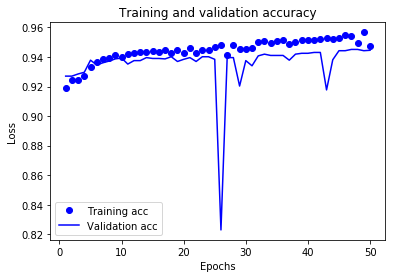

In [13]:
# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.clf()

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
model3 = models.Sequential()

# 4 hidden layers
model3.add(layers.Dense(128, activation='relu', input_shape=(36,)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))

model3.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 6s - loss: 1.0850 - acc: 0.1484

1280/3772 [=========>....................] - ETA: 0s - loss: 0.4499 - acc: 0.8422

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3784 - acc: 0.8849

3772/3772 [==============================] - 0s 111us/step - loss: 0.3507 - acc: 0.8977 - val_loss: 0.2876 - val_acc: 0.9271


Epoch 2/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3107 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.3170 - acc: 0.9169

3072/3772 [=======================>......] - ETA: 0s - loss: 0.3094 - acc: 0.9215

3772/3772 [==============================] - 0s 48us/step - loss: 0.2970 - acc: 0.9247 - val_loss: 0.2813 - val_acc: 0.9271


Epoch 3/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3383 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2834 - acc: 0.9266

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2878 - acc: 0.9222

3772/3772 [==============================] - 0s 48us/step - loss: 0.2792 - acc: 0.9247 - val_loss: 0.2840 - val_acc: 0.9271


Epoch 4/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1296 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2787 - acc: 0.9226

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2686 - acc: 0.9263

3772/3772 [==============================] - 0s 53us/step - loss: 0.2700 - acc: 0.9250 - val_loss: 0.2381 - val_acc: 0.9288


Epoch 5/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1769 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2335 - acc: 0.9310

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2348 - acc: 0.9344

3772/3772 [==============================] - 0s 47us/step - loss: 0.2428 - acc: 0.9305 - val_loss: 0.2229 - val_acc: 0.9344


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1387 - acc: 0.9766

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2400 - acc: 0.9340

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2152 - acc: 0.9407

3772/3772 [==============================] - 0s 48us/step - loss: 0.2354 - acc: 0.9340 - val_loss: 0.2209 - val_acc: 0.9355


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1563 - acc: 0.9609

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1837 - acc: 0.9489

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2089 - acc: 0.9419

3772/3772 [==============================] - 0s 47us/step - loss: 0.2197 - acc: 0.9385 - val_loss: 0.2081 - val_acc: 0.9384


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2268 - acc: 0.9297

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2266 - acc: 0.9339

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2168 - acc: 0.9391

3772/3772 [==============================] - 0s 48us/step - loss: 0.2184 - acc: 0.9382 - val_loss: 0.2421 - val_acc: 0.9344


Epoch 9/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3249 - acc: 0.9141

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2218 - acc: 0.9375

2304/3772 [=================>............] - ETA: 0s - loss: 0.2049 - acc: 0.9405

3772/3772 [==============================] - 0s 53us/step - loss: 0.2091 - acc: 0.9409 - val_loss: 0.2219 - val_acc: 0.9379


Epoch 10/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1675 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2335 - acc: 0.9290

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2158 - acc: 0.9365

3772/3772 [==============================] - 0s 52us/step - loss: 0.2172 - acc: 0.9364 - val_loss: 0.2034 - val_acc: 0.9393


Epoch 11/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1915 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2130 - acc: 0.9344

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2138 - acc: 0.9364

3772/3772 [==============================] - 0s 50us/step - loss: 0.2060 - acc: 0.9396 - val_loss: 0.2030 - val_acc: 0.9399


Epoch 12/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1386 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2136 - acc: 0.9366

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2005 - acc: 0.9435

3772/3772 [==============================] - 0s 49us/step - loss: 0.1971 - acc: 0.9425 - val_loss: 0.2180 - val_acc: 0.9326


Epoch 13/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2634 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2500 - acc: 0.9262

2304/3772 [=================>............] - ETA: 0s - loss: 0.2069 - acc: 0.9405

3772/3772 [==============================] - 0s 52us/step - loss: 0.2096 - acc: 0.9398 - val_loss: 0.2081 - val_acc: 0.9384


Epoch 14/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2117 - acc: 0.9297

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1833 - acc: 0.9470

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2019 - acc: 0.9400

3772/3772 [==============================] - 0s 53us/step - loss: 0.1929 - acc: 0.9425 - val_loss: 0.2369 - val_acc: 0.9253


Epoch 15/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2667 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1742 - acc: 0.9508

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1921 - acc: 0.9449

3772/3772 [==============================] - 0s 52us/step - loss: 0.1971 - acc: 0.9409 - val_loss: 0.2295 - val_acc: 0.9387


Epoch 16/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2185 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2065 - acc: 0.9410

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1882 - acc: 0.9457

3772/3772 [==============================] - 0s 51us/step - loss: 0.1955 - acc: 0.9438 - val_loss: 0.2650 - val_acc: 0.9379


Epoch 17/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1968 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1824 - acc: 0.9470

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1958 - acc: 0.9441

3772/3772 [==============================] - 0s 54us/step - loss: 0.1897 - acc: 0.9443 - val_loss: 0.2017 - val_acc: 0.9405


Epoch 18/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1300 - acc: 0.9609

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1911 - acc: 0.9444

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1904 - acc: 0.9431

3772/3772 [==============================] - 0s 50us/step - loss: 0.1904 - acc: 0.9430 - val_loss: 0.2603 - val_acc: 0.9274


Epoch 19/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2725 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1975 - acc: 0.9430

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1954 - acc: 0.9428

3772/3772 [==============================] - 0s 50us/step - loss: 0.1892 - acc: 0.9438 - val_loss: 0.2357 - val_acc: 0.9259


Epoch 20/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1940 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2297 - acc: 0.9289

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1902 - acc: 0.9435

3772/3772 [==============================] - 0s 49us/step - loss: 0.1891 - acc: 0.9451 - val_loss: 0.2013 - val_acc: 0.9402


Epoch 21/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1383 - acc: 0.9609

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1928 - acc: 0.9439

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1824 - acc: 0.9453

3772/3772 [==============================] - 0s 50us/step - loss: 0.1781 - acc: 0.9446 - val_loss: 0.2684 - val_acc: 0.9148


Epoch 22/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2651 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1935 - acc: 0.9461

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1941 - acc: 0.9398

3772/3772 [==============================] - 0s 52us/step - loss: 0.1892 - acc: 0.9406 - val_loss: 0.1923 - val_acc: 0.9402


Epoch 23/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2082 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1858 - acc: 0.9401

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1681 - acc: 0.9490

3772/3772 [==============================] - 0s 51us/step - loss: 0.1783 - acc: 0.9462 - val_loss: 0.2985 - val_acc: 0.9376


Epoch 24/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1657 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1804 - acc: 0.9436

2048/3772 [===============>..............] - ETA: 0s - loss: 0.1872 - acc: 0.9419

3712/3772 [============================>.] - ETA: 0s - loss: 0.1756 - acc: 0.9448

3772/3772 [==============================] - 0s 57us/step - loss: 0.1740 - acc: 0.9451 - val_loss: 0.2280 - val_acc: 0.9399


Epoch 25/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1349 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1795 - acc: 0.9430

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1883 - acc: 0.9418

3772/3772 [==============================] - 0s 51us/step - loss: 0.1863 - acc: 0.9435 - val_loss: 0.2028 - val_acc: 0.9402


Epoch 26/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1733 - acc: 0.9453

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1614 - acc: 0.9453

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1771 - acc: 0.9441

3772/3772 [==============================] - 0s 55us/step - loss: 0.1753 - acc: 0.9449 - val_loss: 0.1950 - val_acc: 0.9405


Epoch 27/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2047 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1753 - acc: 0.9445

2176/3772 [================>.............] - ETA: 0s - loss: 0.1896 - acc: 0.9444

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1805 - acc: 0.9464

3772/3772 [==============================] - 0s 59us/step - loss: 0.1786 - acc: 0.9470 - val_loss: 0.1930 - val_acc: 0.9393


Epoch 28/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0615 - acc: 0.9844

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1673 - acc: 0.9531

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1779 - acc: 0.9460

3772/3772 [==============================] - 0s 52us/step - loss: 0.1786 - acc: 0.9457 - val_loss: 0.1915 - val_acc: 0.9405


Epoch 29/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1939 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1785 - acc: 0.9437

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1691 - acc: 0.9461

3772/3772 [==============================] - 0s 52us/step - loss: 0.1698 - acc: 0.9462 - val_loss: 0.2001 - val_acc: 0.9393


Epoch 30/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1889 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1863 - acc: 0.9406

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1742 - acc: 0.9453

3772/3772 [==============================] - 0s 52us/step - loss: 0.1688 - acc: 0.9475 - val_loss: 0.1915 - val_acc: 0.9370


Epoch 31/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1376 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1485 - acc: 0.9563

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1569 - acc: 0.9527

3772/3772 [==============================] - 0s 55us/step - loss: 0.1706 - acc: 0.9457 - val_loss: 0.1941 - val_acc: 0.9387


Epoch 32/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1066 - acc: 0.9844

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1682 - acc: 0.9489

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1735 - acc: 0.9482

3772/3772 [==============================] - 0s 49us/step - loss: 0.1684 - acc: 0.9502 - val_loss: 0.2444 - val_acc: 0.9242


Epoch 33/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1788 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1822 - acc: 0.9411

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1787 - acc: 0.9436

3772/3772 [==============================] - 0s 51us/step - loss: 0.1634 - acc: 0.9488 - val_loss: 0.3108 - val_acc: 0.9390


Epoch 34/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1853 - acc: 0.9609

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1935 - acc: 0.9461

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1595 - acc: 0.9527

3772/3772 [==============================] - 0s 54us/step - loss: 0.1732 - acc: 0.9462 - val_loss: 0.1882 - val_acc: 0.9408


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1022 - acc: 0.9766

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1560 - acc: 0.9492

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1611 - acc: 0.9482

3772/3772 [==============================] - 0s 48us/step - loss: 0.1662 - acc: 0.9480 - val_loss: 0.2116 - val_acc: 0.9405


Epoch 36/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1370 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1653 - acc: 0.9427

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1551 - acc: 0.9507

3772/3772 [==============================] - 0s 49us/step - loss: 0.1663 - acc: 0.9462 - val_loss: 0.1853 - val_acc: 0.9425


Epoch 37/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1538 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1610 - acc: 0.9496

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1475 - acc: 0.9546

3772/3772 [==============================] - 0s 51us/step - loss: 0.1547 - acc: 0.9525 - val_loss: 0.1958 - val_acc: 0.9405


Epoch 38/50


 128/3772 [>.............................]

 - ETA: 0s - loss: 0.1662 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1645 - acc: 0.9469

2176/3772 [================>.............] - ETA: 0s - loss: 0.1575 - acc: 0.9517

3712/3772 [============================>.] - ETA: 0s - loss: 0.1610 - acc: 0.9510

3772/3772 [==============================] - 0s 59us/step - loss: 0.1614 - acc: 0.9507 - val_loss: 0.1861 - val_acc: 0.9399


Epoch 39/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1402 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1628 - acc: 0.9499

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1506 - acc: 0.9535

3772/3772 [==============================] - 0s 49us/step - loss: 0.1624 - acc: 0.9494 - val_loss: 0.2030 - val_acc: 0.9411


Epoch 40/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2103 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1379 - acc: 0.9564

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1592 - acc: 0.9497

3772/3772 [==============================] - 0s 50us/step - loss: 0.1593 - acc: 0.9496 - val_loss: 0.1800 - val_acc: 0.9422


Epoch 41/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1967 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1307 - acc: 0.9578

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1449 - acc: 0.9555

3772/3772 [==============================] - 0s 53us/step - loss: 0.1478 - acc: 0.9552 - val_loss: 0.2691 - val_acc: 0.9387


Epoch 42/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2165 - acc: 0.9297

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1217 - acc: 0.9583

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1583 - acc: 0.9474

3772/3772 [==============================] - 0s 56us/step - loss: 0.1541 - acc: 0.9504 - val_loss: 0.2009 - val_acc: 0.9431


Epoch 43/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2283 - acc: 0.9062

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1594 - acc: 0.9474

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1464 - acc: 0.9528

3772/3772 [==============================] - 0s 54us/step - loss: 0.1519 - acc: 0.9512 - val_loss: 0.1807 - val_acc: 0.9417


Epoch 44/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1296 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1759 - acc: 0.9396

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1609 - acc: 0.9482

3772/3772 [==============================] - 0s 54us/step - loss: 0.1540 - acc: 0.9510 - val_loss: 0.1873 - val_acc: 0.9414


Epoch 45/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.0654 - acc: 0.9766

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1451 - acc: 0.9560

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1369 - acc: 0.9589

3772/3772 [==============================] - 0s 55us/step - loss: 0.1554 - acc: 0.9525 - val_loss: 0.2340 - val_acc: 0.9274


Epoch 46/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2172 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1348 - acc: 0.9516

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1555 - acc: 0.9457

3772/3772 [==============================] - 0s 54us/step - loss: 0.1511 - acc: 0.9478 - val_loss: 0.2147 - val_acc: 0.9379


Epoch 47/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1621 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1436 - acc: 0.9557

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1469 - acc: 0.9539

3772/3772 [==============================] - 0s 53us/step - loss: 0.1405 - acc: 0.9555 - val_loss: 0.1995 - val_acc: 0.9434


Epoch 48/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1327 - acc: 0.9609

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1637 - acc: 0.9479

2176/3772 [================>.............] - ETA: 0s - loss: 0.1460 - acc: 0.9540

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1517 - acc: 0.9495

3772/3772 [==============================] - 0s 58us/step - loss: 0.1515 - acc: 0.9496 - val_loss: 0.1797 - val_acc: 0.9408


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1006 - acc: 0.9766

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1481 - acc: 0.9484

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1484 - acc: 0.9501

3772/3772 [==============================] - 0s 53us/step - loss: 0.1431 - acc: 0.9533 - val_loss: 0.1772 - val_acc: 0.9431


Epoch 50/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1161 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2153 - acc: 0.9236

2304/3772 [=================>............] - ETA: 0s - loss: 0.1749 - acc: 0.9379

3772/3772 [==============================] - 0s 52us/step - loss: 0.1531 - acc: 0.9486 - val_loss: 0.1769 - val_acc: 0.9443


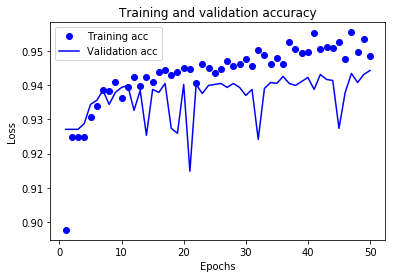

In [14]:
# Plotting the training and validation accuracy
plt.clf()

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

epochs3 = range(1, len(acc3) + 1)

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Add regularisation to the learning algorithm

In [8]:
# With L2 regularisation
model4 = models.Sequential()

# 4 hidden layers
model4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(36,)))
model4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model4.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model4.add(layers.Dense(3, activation='softmax'))

model4.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 7s - loss: 1.4036 - acc: 0.9219

1792/3772 [=============>................] - ETA: 0s - loss: 0.7763 - acc: 0.9241

3456/3772 [==========================>...] - ETA: 0s - loss: 0.7061 - acc: 0.9239

3772/3772 [==============================] - 0s 117us/step - loss: 0.6944 - acc: 0.9247 - val_loss: 0.5872 - val_acc: 0.9271


Epoch 2/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.5585 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.5789 - acc: 0.9271

2816/3772 [=====================>........] - ETA: 0s - loss: 0.5535 - acc: 0.9258

3772/3772 [==============================] - 0s 48us/step - loss: 0.5451 - acc: 0.9247 - val_loss: 0.4916 - val_acc: 0.9271


Epoch 3/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.5356 - acc: 0.9062

1024/3772 [=======>......................] - ETA: 0s - loss: 0.5021 - acc: 0.9199

2304/3772 [=================>............] - ETA: 0s - loss: 0.4750 - acc: 0.9245

3772/3772 [==============================] - 0s 55us/step - loss: 0.4632 - acc: 0.9247 - val_loss: 0.4139 - val_acc: 0.9271


Epoch 4/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2717 - acc: 0.9766

1280/3772 [=========>....................] - ETA: 0s - loss: 0.4471 - acc: 0.9180

2944/3772 [======================>.......] - ETA: 0s - loss: 0.4135 - acc: 0.9253

3772/3772 [==============================] - 0s 47us/step - loss: 0.4103 - acc: 0.9247 - val_loss: 0.4018 - val_acc: 0.9271


Epoch 5/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.4049 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.3845 - acc: 0.9242

2688/3772 [====================>.........] - ETA: 0s - loss: 0.3655 - acc: 0.9286

3772/3772 [==============================] - 0s 49us/step - loss: 0.3749 - acc: 0.9247 - val_loss: 0.3462 - val_acc: 0.9271


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3527 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.3554 - acc: 0.9240

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3466 - acc: 0.9261

3772/3772 [==============================] - 0s 50us/step - loss: 0.3519 - acc: 0.9247 - val_loss: 0.3370 - val_acc: 0.9282


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3012 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.3530 - acc: 0.9212

2944/3772 [======================>.......] - ETA: 0s - loss: 0.3298 - acc: 0.9280

3772/3772 [==============================] - 0s 48us/step - loss: 0.3288 - acc: 0.9271 - val_loss: 0.3282 - val_acc: 0.9373


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3345 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.3298 - acc: 0.9313

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3206 - acc: 0.9332

3772/3772 [==============================] - 0s 50us/step - loss: 0.3152 - acc: 0.9353 - val_loss: 0.3101 - val_acc: 0.9384


Epoch 9/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2592 - acc: 0.9609

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2953 - acc: 0.9418

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3114 - acc: 0.9368

3772/3772 [==============================] - 0s 50us/step - loss: 0.3079 - acc: 0.9361 - val_loss: 0.3034 - val_acc: 0.9384


Epoch 10/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3719 - acc: 0.8906

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2876 - acc: 0.9388

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2989 - acc: 0.9375

3772/3772 [==============================] - 0s 49us/step - loss: 0.2963 - acc: 0.9398 - val_loss: 0.3570 - val_acc: 0.9332


Epoch 11/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3025 - acc: 0.9375

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2580 - acc: 0.9486

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2794 - acc: 0.9411

3772/3772 [==============================] - 0s 46us/step - loss: 0.2910 - acc: 0.9396 - val_loss: 0.2908 - val_acc: 0.9379


Epoch 12/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2050 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2923 - acc: 0.9329

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2802 - acc: 0.9385

3772/3772 [==============================] - 0s 50us/step - loss: 0.2845 - acc: 0.9380 - val_loss: 0.3369 - val_acc: 0.9347


Epoch 13/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3122 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2774 - acc: 0.9383

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2883 - acc: 0.9382

3772/3772 [==============================] - 0s 51us/step - loss: 0.2786 - acc: 0.9401 - val_loss: 0.3094 - val_acc: 0.9335


Epoch 14/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2589 - acc: 0.9609

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2810 - acc: 0.9410

2304/3772 [=================>............] - ETA: 0s - loss: 0.2783 - acc: 0.9401

3772/3772 [==============================] - 0s 53us/step - loss: 0.2690 - acc: 0.9411 - val_loss: 0.3404 - val_acc: 0.9376


Epoch 15/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.4120 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2803 - acc: 0.9469

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2683 - acc: 0.9439

3772/3772 [==============================] - 0s 56us/step - loss: 0.2771 - acc: 0.9409 - val_loss: 0.2642 - val_acc: 0.9379


Epoch 16/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1991 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2642 - acc: 0.9430

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2635 - acc: 0.9449

3772/3772 [==============================] - 0s 52us/step - loss: 0.2654 - acc: 0.9419 - val_loss: 0.2638 - val_acc: 0.9399


Epoch 17/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2489 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2787 - acc: 0.9384

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2548 - acc: 0.9438

3772/3772 [==============================] - 0s 54us/step - loss: 0.2662 - acc: 0.9414 - val_loss: 0.2594 - val_acc: 0.9402


Epoch 18/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1925 - acc: 0.9531

 896/3772 [======>.......................] - ETA: 0s - loss: 0.2435 - acc: 0.9431

1664/3772 [============>.................] - ETA: 0s - loss: 0.2475 - acc: 0.9411

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2496 - acc: 0.9403

3772/3772 [==============================] - 0s 62us/step - loss: 0.2511 - acc: 0.9414 - val_loss: 0.3511 - val_acc: 0.9355


Epoch 19/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3655 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2450 - acc: 0.9477

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2453 - acc: 0.9449

3772/3772 [==============================] - 0s 52us/step - loss: 0.2606 - acc: 0.9414 - val_loss: 0.2639 - val_acc: 0.9387


Epoch 20/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3102 - acc: 0.9297

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2525 - acc: 0.9453

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2600 - acc: 0.9414

3772/3772 [==============================] - 0s 56us/step - loss: 0.2512 - acc: 0.9433 - val_loss: 0.2512 - val_acc: 0.9393


Epoch 21/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1738 - acc: 0.9766

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2459 - acc: 0.9430

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2619 - acc: 0.9391

3772/3772 [==============================] - 0s 53us/step - loss: 0.2500 - acc: 0.9427 - val_loss: 0.2755 - val_acc: 0.9399


Epoch 22/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2782 - acc: 0.9297

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2808 - acc: 0.9346

2304/3772 [=================>............] - ETA: 0s - loss: 0.2662 - acc: 0.9384

3772/3772 [==============================] - 0s 56us/step - loss: 0.2472 - acc: 0.9425 - val_loss: 0.3399 - val_acc: 0.9376


Epoch 23/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1850 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2334 - acc: 0.9469

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2455 - acc: 0.9396

3772/3772 [==============================] - 0s 52us/step - loss: 0.2481 - acc: 0.9419 - val_loss: 0.2536 - val_acc: 0.9399


Epoch 24/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2068 - acc: 0.9609

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2296 - acc: 0.9467

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2566 - acc: 0.9394

3772/3772 [==============================] - 0s 54us/step - loss: 0.2468 - acc: 0.9414 - val_loss: 0.2492 - val_acc: 0.9396


Epoch 25/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2868 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2546 - acc: 0.9384

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2523 - acc: 0.9418

3772/3772 [==============================] - 0s 54us/step - loss: 0.2421 - acc: 0.9433 - val_loss: 0.2468 - val_acc: 0.9393


Epoch 26/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2456 - acc: 0.9375

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2211 - acc: 0.9502

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2257 - acc: 0.9490

3772/3772 [==============================] - 0s 54us/step - loss: 0.2428 - acc: 0.9427 - val_loss: 0.2468 - val_acc: 0.9393


Epoch 27/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2377 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2532 - acc: 0.9375

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2414 - acc: 0.9423

3772/3772 [==============================] - 0s 52us/step - loss: 0.2381 - acc: 0.9435 - val_loss: 0.3073 - val_acc: 0.9396


Epoch 28/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2544 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2506 - acc: 0.9391

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2365 - acc: 0.9418

3772/3772 [==============================] - 0s 53us/step - loss: 0.2388 - acc: 0.9417 - val_loss: 0.2443 - val_acc: 0.9405


Epoch 29/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2316 - acc: 0.9375

 768/3772 [=====>........................] - ETA: 0s - loss: 0.2200 - acc: 0.9466

1792/3772 [=============>................] - ETA: 0s - loss: 0.2402 - acc: 0.9431

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2427 - acc: 0.9406

3772/3772 [==============================] - 0s 62us/step - loss: 0.2398 - acc: 0.9417 - val_loss: 0.2614 - val_acc: 0.9405


Epoch 30/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2193 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2625 - acc: 0.9344

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2609 - acc: 0.9357

3772/3772 [==============================] - 0s 53us/step - loss: 0.2437 - acc: 0.9409 - val_loss: 0.2388 - val_acc: 0.9390


Epoch 31/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2329 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2540 - acc: 0.9313

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2233 - acc: 0.9464

3772/3772 [==============================] - 0s 50us/step - loss: 0.2378 - acc: 0.9430 - val_loss: 0.2454 - val_acc: 0.9399


Epoch 32/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3709 - acc: 0.8906

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2528 - acc: 0.9314

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2356 - acc: 0.9412

3772/3772 [==============================] - 0s 54us/step - loss: 0.2277 - acc: 0.9435 - val_loss: 0.3150 - val_acc: 0.9393


Epoch 33/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2950 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2461 - acc: 0.9375

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2282 - acc: 0.9457

3772/3772 [==============================] - 0s 52us/step - loss: 0.2367 - acc: 0.9422 - val_loss: 0.2355 - val_acc: 0.9390


Epoch 34/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2098 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2264 - acc: 0.9445

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2388 - acc: 0.9398

3772/3772 [==============================] - 0s 56us/step - loss: 0.2285 - acc: 0.9441 - val_loss: 0.2848 - val_acc: 0.9396


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2812 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2149 - acc: 0.9484

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2293 - acc: 0.9418

3772/3772 [==============================] - 0s 54us/step - loss: 0.2293 - acc: 0.9417 - val_loss: 0.2483 - val_acc: 0.9367


Epoch 36/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3094 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2183 - acc: 0.9445

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2279 - acc: 0.9435

3772/3772 [==============================] - 0s 52us/step - loss: 0.2284 - acc: 0.9427 - val_loss: 0.2346 - val_acc: 0.9387


Epoch 37/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1500 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2588 - acc: 0.9325

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2284 - acc: 0.9427

3772/3772 [==============================] - 0s 54us/step - loss: 0.2277 - acc: 0.9419 - val_loss: 0.2368 - val_acc: 0.9402


Epoch 38/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2044 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2387 - acc: 0.9352

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2169 - acc: 0.9482

3772/3772 [==============================] - 0s 50us/step - loss: 0.2258 - acc: 0.9443 - val_loss: 0.2363 - val_acc: 0.9387


Epoch 39/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2849 - acc: 0.9062

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2390 - acc: 0.9383

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2292 - acc: 0.9437

3772/3772 [==============================] - 0s 54us/step - loss: 0.2260 - acc: 0.9433 - val_loss: 0.2322 - val_acc: 0.9387


Epoch 40/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2390 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2325 - acc: 0.9361

2304/3772 [=================>............] - ETA: 0s - loss: 0.2151 - acc: 0.9431

3712/3772 [============================>.] - ETA: 0s - loss: 0.2265 - acc: 0.9418

3772/3772 [==============================] - 0s 57us/step - loss: 0.2257 - acc: 0.9419 - val_loss: 0.2389 - val_acc: 0.9402


Epoch 41/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1603 - acc: 0.9688

 896/3772 [======>.......................] - ETA: 0s - loss: 0.2235 - acc: 0.9487

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2385 - acc: 0.9395

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2248 - acc: 0.9434

3772/3772 [==============================] - 0s 67us/step - loss: 0.2297 - acc: 0.9435 - val_loss: 0.2723 - val_acc: 0.9393


Epoch 42/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2211 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2102 - acc: 0.9453

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2201 - acc: 0.9438

3772/3772 [==============================] - 0s 54us/step - loss: 0.2230 - acc: 0.9427 - val_loss: 0.2679 - val_acc: 0.9390


Epoch 43/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2904 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2296 - acc: 0.9446

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2264 - acc: 0.9431

3772/3772 [==============================] - 0s 56us/step - loss: 0.2248 - acc: 0.9427 - val_loss: 0.2539 - val_acc: 0.9411


Epoch 44/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1640 - acc: 0.9609

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2056 - acc: 0.9477

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2276 - acc: 0.9414

3772/3772 [==============================] - 0s 53us/step - loss: 0.2262 - acc: 0.9427 - val_loss: 0.2488 - val_acc: 0.9399


Epoch 45/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1667 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2124 - acc: 0.9437

2304/3772 [=================>............] - ETA: 0s - loss: 0.2048 - acc: 0.9479

3712/3772 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9448

3772/3772 [==============================] - 0s 57us/step - loss: 0.2153 - acc: 0.9441 - val_loss: 0.2512 - val_acc: 0.9405


Epoch 46/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1584 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2242 - acc: 0.9453

2304/3772 [=================>............] - ETA: 0s - loss: 0.2158 - acc: 0.9462

3772/3772 [==============================] - 0s 52us/step - loss: 0.2203 - acc: 0.9441 - val_loss: 0.2311 - val_acc: 0.9399


Epoch 47/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2166 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1946 - acc: 0.9540

2304/3772 [=================>............] - ETA: 0s - loss: 0.1949 - acc: 0.9510

3772/3772 [==============================] - 0s 56us/step - loss: 0.2216 - acc: 0.9433 - val_loss: 0.2321 - val_acc: 0.9402


Epoch 48/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3015 - acc: 0.9219

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2264 - acc: 0.9395

1664/3772 [============>.................] - ETA: 0s - loss: 0.2178 - acc: 0.9435

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2168 - acc: 0.9445

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2233 - acc: 0.9447

3772/3772 [==============================] - 0s 82us/step - loss: 0.2232 - acc: 0.9441 - val_loss: 0.2266 - val_acc: 0.9393


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2167 - acc: 0.9375

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2524 - acc: 0.9306

1920/3772 [==============>...............] - ETA: 0s - loss: 0.2397 - acc: 0.9349

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2265 - acc: 0.9421

3772/3772 [==============================] - 0s 70us/step - loss: 0.2189 - acc: 0.9433 - val_loss: 0.2380 - val_acc: 0.9393


Epoch 50/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1922 - acc: 0.9531

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2313 - acc: 0.9463

1920/3772 [==============>...............] - ETA: 0s - loss: 0.2300 - acc: 0.9422

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2260 - acc: 0.9428

3772/3772 [==============================] - 0s 65us/step - loss: 0.2181 - acc: 0.9443 - val_loss: 0.2476 - val_acc: 0.9352


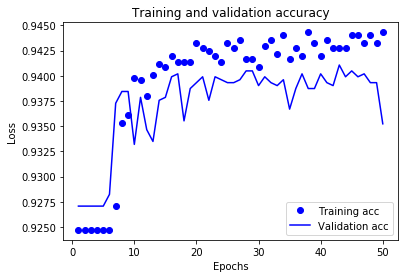

In [9]:
# Plotting the training and validation accuracy
plt.clf()

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']

epochs4 = range(1, len(acc4) + 1)

plt.plot(epochs4, acc4, 'bo', label='Training acc')
plt.plot(epochs4, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# With dropout
model5 = models.Sequential()

# 4 hidden layers with 2 dropout layers
model5.add(layers.Dense(128, activation='relu', input_shape=(36,)))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(3, activation='softmax'))

model5.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history5 = model5.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 10s - loss: 1.1499 - acc: 0.2969

1152/3772 [========>.....................] - ETA: 0s - loss: 0.5659 - acc: 0.8377 

2304/3772 [=================>............] - ETA: 0s - loss: 0.4322 - acc: 0.8880

3072/3772 [=======================>......] - ETA: 0s - loss: 0.4090 - acc: 0.8984

3772/3772 [==============================] - 1s 170us/step - loss: 0.3995 - acc: 0.9022 - val_loss: 0.2937 - val_acc: 0.9271


Epoch 2/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.4628 - acc: 0.8828

1024/3772 [=======>......................] - ETA: 0s - loss: 0.3732 - acc: 0.9131

2304/3772 [=================>............] - ETA: 0s - loss: 0.3278 - acc: 0.9249

3328/3772 [=========================>....] - ETA: 0s - loss: 0.3263 - acc: 0.9252

3772/3772 [==============================] - 0s 63us/step - loss: 0.3266 - acc: 0.9247 - val_loss: 0.2821 - val_acc: 0.9271


Epoch 3/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2669 - acc: 0.9297

1408/3772 [==========>...................] - ETA: 0s - loss: 0.3129 - acc: 0.9219

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3112 - acc: 0.9240

3772/3772 [==============================] - 0s 50us/step - loss: 0.3113 - acc: 0.9247 - val_loss: 0.2767 - val_acc: 0.9271


Epoch 4/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3113 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.3205 - acc: 0.9164

2816/3772 [=====================>........] - ETA: 0s - loss: 0.3062 - acc: 0.9229

3772/3772 [==============================] - 0s 57us/step - loss: 0.2928 - acc: 0.9247 - val_loss: 0.2603 - val_acc: 0.9271


Epoch 5/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2396 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2709 - acc: 0.9219

2304/3772 [=================>............] - ETA: 0s - loss: 0.2789 - acc: 0.9240

3584/3772 [===========================>..] - ETA: 0s - loss: 0.2753 - acc: 0.9255

3772/3772 [==============================] - 0s 59us/step - loss: 0.2768 - acc: 0.9247 - val_loss: 0.2748 - val_acc: 0.9271


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1376 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2843 - acc: 0.9197

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2862 - acc: 0.9200

3772/3772 [==============================] - 0s 53us/step - loss: 0.2662 - acc: 0.9250 - val_loss: 0.2451 - val_acc: 0.9309


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2624 - acc: 0.9141

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2643 - acc: 0.9226

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2498 - acc: 0.9263

3772/3772 [==============================] - 0s 57us/step - loss: 0.2518 - acc: 0.9282 - val_loss: 0.2205 - val_acc: 0.9361


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3163 - acc: 0.9062

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2577 - acc: 0.9258

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2390 - acc: 0.9353

3772/3772 [==============================] - 0s 53us/step - loss: 0.2392 - acc: 0.9340 - val_loss: 0.2372 - val_acc: 0.9384


Epoch 9/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2295 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2280 - acc: 0.9375

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2239 - acc: 0.9379

3772/3772 [==============================] - 0s 54us/step - loss: 0.2313 - acc: 0.9377 - val_loss: 0.2099 - val_acc: 0.9393


Epoch 10/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2032 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2080 - acc: 0.9453

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2197 - acc: 0.9421

3772/3772 [==============================] - 0s 51us/step - loss: 0.2259 - acc: 0.9393 - val_loss: 0.2039 - val_acc: 0.9393


Epoch 11/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2335 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2359 - acc: 0.9391

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2231 - acc: 0.9402

3772/3772 [==============================] - 0s 53us/step - loss: 0.2198 - acc: 0.9406 - val_loss: 0.2032 - val_acc: 0.9376


Epoch 12/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1820 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2095 - acc: 0.9366

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2005 - acc: 0.9423

3772/3772 [==============================] - 0s 53us/step - loss: 0.2180 - acc: 0.9364 - val_loss: 0.2013 - val_acc: 0.9387


Epoch 13/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1828 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2182 - acc: 0.9320

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2042 - acc: 0.9386

3772/3772 [==============================] - 0s 53us/step - loss: 0.2006 - acc: 0.9419 - val_loss: 0.2271 - val_acc: 0.9390


Epoch 14/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1946 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1977 - acc: 0.9470

2304/3772 [=================>............] - ETA: 0s - loss: 0.2190 - acc: 0.9423

3584/3772 [===========================>..] - ETA: 0s - loss: 0.2069 - acc: 0.9417

3772/3772 [==============================] - 0s 57us/step - loss: 0.2078 - acc: 0.9414 - val_loss: 0.2199 - val_acc: 0.9393


Epoch 15/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2960 - acc: 0.9141

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2090 - acc: 0.9418

2432/3772 [==================>...........] - ETA: 0s - loss: 0.2137 - acc: 0.9387

3772/3772 [==============================] - 0s 53us/step - loss: 0.2060 - acc: 0.9419 - val_loss: 0.2003 - val_acc: 0.9376


Epoch 16/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1855 - acc: 0.9453

1024/3772 [=======>......................] - ETA: 0s - loss: 0.2048 - acc: 0.9414

2304/3772 [=================>............] - ETA: 0s - loss: 0.1968 - acc: 0.9453

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1982 - acc: 0.9431

3772/3772 [==============================] - 0s 58us/step - loss: 0.2018 - acc: 0.9425 - val_loss: 0.2931 - val_acc: 0.9262


Epoch 17/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2933 - acc: 0.9141

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1840 - acc: 0.9453

2304/3772 [=================>............] - ETA: 0s - loss: 0.1976 - acc: 0.9418

3712/3772 [============================>.] - ETA: 0s - loss: 0.1956 - acc: 0.9429

3772/3772 [==============================] - 0s 56us/step - loss: 0.1999 - acc: 0.9419 - val_loss: 0.2512 - val_acc: 0.9344


Epoch 18/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2209 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1979 - acc: 0.9436

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2110 - acc: 0.9383

3772/3772 [==============================] - 0s 59us/step - loss: 0.1987 - acc: 0.9419 - val_loss: 0.2071 - val_acc: 0.9390


Epoch 19/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2581 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2187 - acc: 0.9349

2304/3772 [=================>............] - ETA: 0s - loss: 0.2099 - acc: 0.9401

3772/3772 [==============================] - 0s 56us/step - loss: 0.2036 - acc: 0.9433 - val_loss: 0.2927 - val_acc: 0.9204


Epoch 20/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2938 - acc: 0.9141

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1946 - acc: 0.9401

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1801 - acc: 0.9457

3772/3772 [==============================] - 0s 56us/step - loss: 0.1935 - acc: 0.9433 - val_loss: 0.2093 - val_acc: 0.9390


Epoch 21/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1380 - acc: 0.9531

 896/3772 [======>.......................] - ETA: 0s - loss: 0.1875 - acc: 0.9464

2304/3772 [=================>............] - ETA: 0s - loss: 0.1858 - acc: 0.9457

3712/3772 [============================>.] - ETA: 0s - loss: 0.1871 - acc: 0.9448

3772/3772 [==============================] - 0s 59us/step - loss: 0.1892 - acc: 0.9441 - val_loss: 0.2269 - val_acc: 0.9349


Epoch 22/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2190 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1876 - acc: 0.9418

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1834 - acc: 0.9424

3772/3772 [==============================] - 0s 56us/step - loss: 0.1906 - acc: 0.9425 - val_loss: 0.1950 - val_acc: 0.9393


Epoch 23/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1892 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1985 - acc: 0.9444

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1919 - acc: 0.9441

3772/3772 [==============================] - 0s 56us/step - loss: 0.1900 - acc: 0.9427 - val_loss: 0.1999 - val_acc: 0.9376


Epoch 24/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2626 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1883 - acc: 0.9462

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1762 - acc: 0.9482

3712/3772 [============================>.] - ETA: 0s - loss: 0.1870 - acc: 0.9440

3772/3772 [==============================] - 0s 61us/step - loss: 0.1875 - acc: 0.9441 - val_loss: 0.2026 - val_acc: 0.9382


Epoch 25/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2096 - acc: 0.9297

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2033 - acc: 0.9340

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1928 - acc: 0.9383

3772/3772 [==============================] - 0s 56us/step - loss: 0.1890 - acc: 0.9427 - val_loss: 0.1934 - val_acc: 0.9382


Epoch 26/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1276 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1880 - acc: 0.9410

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1759 - acc: 0.9453

3712/3772 [============================>.] - ETA: 0s - loss: 0.1833 - acc: 0.9432

3772/3772 [==============================] - 0s 57us/step - loss: 0.1824 - acc: 0.9433 - val_loss: 0.1912 - val_acc: 0.9387


Epoch 27/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1336 - acc: 0.9531

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1625 - acc: 0.9488

2304/3772 [=================>............] - ETA: 0s - loss: 0.1792 - acc: 0.9462

3712/3772 [============================>.] - ETA: 0s - loss: 0.1766 - acc: 0.9453

3772/3772 [==============================] - 0s 57us/step - loss: 0.1786 - acc: 0.9449 - val_loss: 0.2091 - val_acc: 0.9396


Epoch 28/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1989 - acc: 0.9375

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1860 - acc: 0.9404

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1917 - acc: 0.9404

3772/3772 [==============================] - 0s 57us/step - loss: 0.1909 - acc: 0.9425 - val_loss: 0.1948 - val_acc: 0.9390


Epoch 29/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1483 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1476 - acc: 0.9547

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1624 - acc: 0.9509

3772/3772 [==============================] - 0s 54us/step - loss: 0.1768 - acc: 0.9446 - val_loss: 0.3260 - val_acc: 0.9233


Epoch 30/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3041 - acc: 0.9297

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1942 - acc: 0.9384

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1830 - acc: 0.9445

3772/3772 [==============================] - 0s 55us/step - loss: 0.1832 - acc: 0.9449 - val_loss: 0.2170 - val_acc: 0.9390


Epoch 31/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2594 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1643 - acc: 0.9492

2304/3772 [=================>............] - ETA: 0s - loss: 0.1673 - acc: 0.9475

3712/3772 [============================>.] - ETA: 0s - loss: 0.1792 - acc: 0.9445

3772/3772 [==============================] - 0s 59us/step - loss: 0.1787 - acc: 0.9446 - val_loss: 0.2451 - val_acc: 0.9402


Epoch 32/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1843 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1458 - acc: 0.9555

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1669 - acc: 0.9498

3772/3772 [==============================] - 0s 56us/step - loss: 0.1847 - acc: 0.9441 - val_loss: 0.2075 - val_acc: 0.9396


Epoch 33/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1285 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1617 - acc: 0.9488

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1614 - acc: 0.9480

3772/3772 [==============================] - 0s 57us/step - loss: 0.1652 - acc: 0.9467 - val_loss: 0.2061 - val_acc: 0.9390


Epoch 34/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1878 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1713 - acc: 0.9488

2304/3772 [=================>............] - ETA: 0s - loss: 0.1771 - acc: 0.9436

3712/3772 [============================>.] - ETA: 0s - loss: 0.1829 - acc: 0.9418

3772/3772 [==============================] - 0s 58us/step - loss: 0.1821 - acc: 0.9419 - val_loss: 0.2111 - val_acc: 0.9402


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1321 - acc: 0.9453

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1913 - acc: 0.9424

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1851 - acc: 0.9411

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1712 - acc: 0.9453

3772/3772 [==============================] - 0s 72us/step - loss: 0.1676 - acc: 0.9462 - val_loss: 0.1915 - val_acc: 0.9396


Epoch 36/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1152 - acc: 0.9766

 768/3772 [=====>........................] - ETA: 0s - loss: 0.1767 - acc: 0.9492

1920/3772 [==============>...............] - ETA: 0s - loss: 0.1815 - acc: 0.9464

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1716 - acc: 0.9498

3772/3772 [==============================] - 0s 62us/step - loss: 0.1834 - acc: 0.9462 - val_loss: 0.2007 - val_acc: 0.9396


Epoch 37/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2062 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1553 - acc: 0.9462

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1662 - acc: 0.9477

3772/3772 [==============================] - 0s 57us/step - loss: 0.1693 - acc: 0.9480 - val_loss: 0.2358 - val_acc: 0.9405


Epoch 38/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1905 - acc: 0.9453

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1409 - acc: 0.9523

2304/3772 [=================>............] - ETA: 0s - loss: 0.1652 - acc: 0.9484

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1625 - acc: 0.9484

3772/3772 [==============================] - 0s 60us/step - loss: 0.1695 - acc: 0.9464 - val_loss: 0.1976 - val_acc: 0.9396


Epoch 39/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2613 - acc: 0.8906

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1316 - acc: 0.9547

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1500 - acc: 0.9527

3772/3772 [==============================] - 0s 55us/step - loss: 0.1637 - acc: 0.9488 - val_loss: 0.1996 - val_acc: 0.9396


Epoch 40/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2429 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1758 - acc: 0.9406

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1562 - acc: 0.9507

3584/3772 [===========================>..] - ETA: 0s - loss: 0.1654 - acc: 0.9473

3772/3772 [==============================] - 0s 61us/step - loss: 0.1645 - acc: 0.9480 - val_loss: 0.2245 - val_acc: 0.9390


Epoch 41/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2356 - acc: 0.9141

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1716 - acc: 0.9401

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1762 - acc: 0.9437

3712/3772 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9472

3772/3772 [==============================] - 0s 55us/step - loss: 0.1650 - acc: 0.9472 - val_loss: 0.2054 - val_acc: 0.9408


Epoch 42/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1725 - acc: 0.9297

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1637 - acc: 0.9502

1664/3772 [============>.................] - ETA: 0s - loss: 0.1723 - acc: 0.9495

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1744 - acc: 0.9480

3772/3772 [==============================] - 0s 66us/step - loss: 0.1727 - acc: 0.9475 - val_loss: 0.2738 - val_acc: 0.9253


Epoch 43/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1946 - acc: 0.9609

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1461 - acc: 0.9521

2304/3772 [=================>............] - ETA: 0s - loss: 0.1517 - acc: 0.9514

3772/3772 [==============================] - 0s 56us/step - loss: 0.1583 - acc: 0.9472 - val_loss: 0.2114 - val_acc: 0.9399


Epoch 44/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2036 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1827 - acc: 0.9422

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1689 - acc: 0.9475

3772/3772 [==============================] - 0s 53us/step - loss: 0.1605 - acc: 0.9515 - val_loss: 0.2281 - val_acc: 0.9349


Epoch 45/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2171 - acc: 0.9141

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1800 - acc: 0.9462

2304/3772 [=================>............] - ETA: 0s - loss: 0.1611 - acc: 0.9518

3712/3772 [============================>.] - ETA: 0s - loss: 0.1644 - acc: 0.9496

3772/3772 [==============================] - 0s 60us/step - loss: 0.1639 - acc: 0.9499 - val_loss: 0.2051 - val_acc: 0.9393


Epoch 46/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2524 - acc: 0.9219

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1660 - acc: 0.9479

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1574 - acc: 0.9490

3712/3772 [============================>.] - ETA: 0s - loss: 0.1628 - acc: 0.9496

3772/3772 [==============================] - 0s 60us/step - loss: 0.1634 - acc: 0.9499 - val_loss: 0.2170 - val_acc: 0.9399


Epoch 47/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1381 - acc: 0.9609

1024/3772 [=======>......................] - ETA: 0s - loss: 0.1444 - acc: 0.9541

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1606 - acc: 0.9523

3772/3772 [==============================] - 0s 58us/step - loss: 0.1571 - acc: 0.9515 - val_loss: 0.2729 - val_acc: 0.9107


Epoch 48/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2513 - acc: 0.9062

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1566 - acc: 0.9477

2432/3772 [==================>...........] - ETA: 0s - loss: 0.1587 - acc: 0.9470

3772/3772 [==============================] - 0s 55us/step - loss: 0.1611 - acc: 0.9478 - val_loss: 0.2162 - val_acc: 0.9414


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0599 - acc: 0.9766

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1561 - acc: 0.9497

2304/3772 [=================>............] - ETA: 0s - loss: 0.1496 - acc: 0.9566

3712/3772 [============================>.] - ETA: 0s - loss: 0.1624 - acc: 0.9502

3772/3772 [==============================] - 0s 57us/step - loss: 0.1640 - acc: 0.9502 - val_loss: 0.2217 - val_acc: 0.9419


Epoch 50/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2161 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1361 - acc: 0.9516

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1524 - acc: 0.9483

3772/3772 [==============================] - 0s 54us/step - loss: 0.1415 - acc: 0.9536 - val_loss: 0.2216 - val_acc: 0.9352


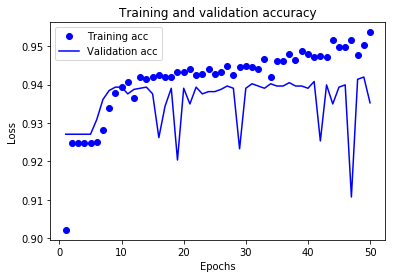

In [11]:
# Plotting the training and validation accuracy
plt.clf()

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']

epochs5 = range(1, len(acc5) + 1)

plt.plot(epochs5, acc5, 'bo', label='Training acc')
plt.plot(epochs5, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Smaller network With dropout
model6 = models.Sequential()

# 4 hidden layers with 2 dropout layers
model6.add(layers.Dense(96, activation='relu', input_shape=(36,)))
model6.add(layers.Dense(96, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(96, activation='relu'))
model6.add(layers.Dense(96, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(3, activation='softmax'))

model6.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history6 = model6.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 8s - loss: 1.3057 - acc: 0.1719

1664/3772 [============>.................] - ETA: 0s - loss: 0.5158 - acc: 0.8552

3456/3772 [==========================>...] - ETA: 0s - loss: 0.4283 - acc: 0.8921

3772/3772 [==============================] - 1s 135us/step - loss: 0.4233 - acc: 0.8948 - val_loss: 0.3113 - val_acc: 0.9271


Epoch 2/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2077 - acc: 0.9688

1152/3772 [========>.....................] - ETA: 0s - loss: 0.3196 - acc: 0.9323

2688/3772 [====================>.........] - ETA: 0s - loss: 0.3437 - acc: 0.9226

3772/3772 [==============================] - 0s 49us/step - loss: 0.3335 - acc: 0.9247 - val_loss: 0.2959 - val_acc: 0.9271


Epoch 3/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2166 - acc: 0.9609

1664/3772 [============>.................] - ETA: 0s - loss: 0.3199 - acc: 0.9285

3456/3772 [==========================>...] - ETA: 0s - loss: 0.3306 - acc: 0.9236

3772/3772 [==============================] - 0s 47us/step - loss: 0.3264 - acc: 0.9247 - val_loss: 0.2989 - val_acc: 0.9271


Epoch 4/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2458 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2952 - acc: 0.9261

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2991 - acc: 0.9266

3772/3772 [==============================] - 0s 48us/step - loss: 0.3026 - acc: 0.9247 - val_loss: 0.2633 - val_acc: 0.9271


Epoch 5/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2932 - acc: 0.9219

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2920 - acc: 0.9251

3328/3772 [=========================>....] - ETA: 0s - loss: 0.3016 - acc: 0.9225

3772/3772 [==============================] - 0s 47us/step - loss: 0.2939 - acc: 0.9247 - val_loss: 0.2575 - val_acc: 0.9271


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1829 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2618 - acc: 0.9290

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2732 - acc: 0.9258

3772/3772 [==============================] - 0s 47us/step - loss: 0.2713 - acc: 0.9247 - val_loss: 0.2613 - val_acc: 0.9271


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2228 - acc: 0.9375

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2524 - acc: 0.9258

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2518 - acc: 0.9279

3772/3772 [==============================] - 0s 46us/step - loss: 0.2580 - acc: 0.9247 - val_loss: 0.2458 - val_acc: 0.9338


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2888 - acc: 0.9062

1664/3772 [============>.................] - ETA: 0s - loss: 0.2543 - acc: 0.9249

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2402 - acc: 0.9309

3772/3772 [==============================] - 0s 47us/step - loss: 0.2483 - acc: 0.9290 - val_loss: 0.2353 - val_acc: 0.9387


Epoch 9/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2305 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2349 - acc: 0.9323

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2354 - acc: 0.9352

3772/3772 [==============================] - 0s 49us/step - loss: 0.2378 - acc: 0.9353 - val_loss: 0.2134 - val_acc: 0.9382


Epoch 10/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2116 - acc: 0.9453

1664/3772 [============>.................] - ETA: 0s - loss: 0.1953 - acc: 0.9495

3456/3772 [==========================>...] - ETA: 0s - loss: 0.2271 - acc: 0.9375

3772/3772 [==============================] - 0s 48us/step - loss: 0.2244 - acc: 0.9380 - val_loss: 0.2308 - val_acc: 0.9384


Epoch 11/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3618 - acc: 0.9062

1664/3772 [============>.................] - ETA: 0s - loss: 0.2345 - acc: 0.9339

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2217 - acc: 0.9372

3772/3772 [==============================] - 0s 46us/step - loss: 0.2247 - acc: 0.9374 - val_loss: 0.2058 - val_acc: 0.9396


Epoch 12/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2544 - acc: 0.9297

1664/3772 [============>.................] - ETA: 0s - loss: 0.2072 - acc: 0.9435

3456/3772 [==========================>...] - ETA: 0s - loss: 0.2189 - acc: 0.9401

3772/3772 [==============================] - 0s 47us/step - loss: 0.2143 - acc: 0.9411 - val_loss: 0.2035 - val_acc: 0.9399


Epoch 13/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1419 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2341 - acc: 0.9316

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2069 - acc: 0.9406

3772/3772 [==============================] - 0s 46us/step - loss: 0.2093 - acc: 0.9398 - val_loss: 0.2185 - val_acc: 0.9376


Epoch 14/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1795 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1983 - acc: 0.9439

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2198 - acc: 0.9355

3772/3772 [==============================] - 0s 47us/step - loss: 0.2130 - acc: 0.9388 - val_loss: 0.2173 - val_acc: 0.9338


Epoch 15/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1822 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2019 - acc: 0.9403

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1932 - acc: 0.9434

3772/3772 [==============================] - 0s 48us/step - loss: 0.2025 - acc: 0.9403 - val_loss: 0.1999 - val_acc: 0.9390


Epoch 16/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2699 - acc: 0.8984

1664/3772 [============>.................] - ETA: 0s - loss: 0.2182 - acc: 0.9357

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2041 - acc: 0.9404

3772/3772 [==============================] - 0s 48us/step - loss: 0.1986 - acc: 0.9422 - val_loss: 0.2002 - val_acc: 0.9384


Epoch 17/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1087 - acc: 0.9688

1664/3772 [============>.................] - ETA: 0s - loss: 0.1930 - acc: 0.9453

3328/3772 [=========================>....] - ETA: 0s - loss: 0.2032 - acc: 0.9402

3772/3772 [==============================] - 0s 46us/step - loss: 0.1992 - acc: 0.9419 - val_loss: 0.2295 - val_acc: 0.9393


Epoch 18/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1333 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2083 - acc: 0.9474

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2095 - acc: 0.9426

3772/3772 [==============================] - 0s 49us/step - loss: 0.2040 - acc: 0.9422 - val_loss: 0.2267 - val_acc: 0.9402


Epoch 19/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1695 - acc: 0.9375

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2099 - acc: 0.9362

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2021 - acc: 0.9394

3772/3772 [==============================] - 0s 49us/step - loss: 0.1997 - acc: 0.9401 - val_loss: 0.2053 - val_acc: 0.9384


Epoch 20/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2074 - acc: 0.9375

1664/3772 [============>.................] - ETA: 0s - loss: 0.1946 - acc: 0.9435

3456/3772 [==========================>...] - ETA: 0s - loss: 0.1951 - acc: 0.9436

3772/3772 [==============================] - 0s 46us/step - loss: 0.1939 - acc: 0.9433 - val_loss: 0.2030 - val_acc: 0.9396


Epoch 21/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1549 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1675 - acc: 0.9503

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1944 - acc: 0.9418

3772/3772 [==============================] - 0s 49us/step - loss: 0.1951 - acc: 0.9433 - val_loss: 0.2015 - val_acc: 0.9393


Epoch 22/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1086 - acc: 0.9844

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1975 - acc: 0.9395

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2029 - acc: 0.9368

3772/3772 [==============================] - 0s 49us/step - loss: 0.1922 - acc: 0.9422 - val_loss: 0.1998 - val_acc: 0.9396


Epoch 23/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2111 - acc: 0.9141

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2048 - acc: 0.9375

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1909 - acc: 0.9422

3772/3772 [==============================] - 0s 48us/step - loss: 0.1887 - acc: 0.9433 - val_loss: 0.2032 - val_acc: 0.9384


Epoch 24/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1646 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1652 - acc: 0.9553

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1841 - acc: 0.9456

3772/3772 [==============================] - 0s 49us/step - loss: 0.1876 - acc: 0.9441 - val_loss: 0.4127 - val_acc: 0.8880


Epoch 25/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3662 - acc: 0.8984

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2026 - acc: 0.9367

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1981 - acc: 0.9389

3772/3772 [==============================] - 0s 51us/step - loss: 0.1911 - acc: 0.9411 - val_loss: 0.1969 - val_acc: 0.9393


Epoch 26/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1570 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1881 - acc: 0.9401

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1955 - acc: 0.9395

3772/3772 [==============================] - 0s 50us/step - loss: 0.1917 - acc: 0.9414 - val_loss: 0.2084 - val_acc: 0.9399


Epoch 27/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2582 - acc: 0.9375

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1684 - acc: 0.9489

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1869 - acc: 0.9421

3772/3772 [==============================] - 0s 48us/step - loss: 0.1804 - acc: 0.9441 - val_loss: 0.2515 - val_acc: 0.9402


Epoch 28/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2153 - acc: 0.9375

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1720 - acc: 0.9447

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1822 - acc: 0.9423

3772/3772 [==============================] - 0s 50us/step - loss: 0.1818 - acc: 0.9433 - val_loss: 0.1950 - val_acc: 0.9408


Epoch 29/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1591 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1808 - acc: 0.9368

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1804 - acc: 0.9408

3772/3772 [==============================] - 0s 46us/step - loss: 0.1774 - acc: 0.9433 - val_loss: 0.1973 - val_acc: 0.9396


Epoch 30/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1761 - acc: 0.9375

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1887 - acc: 0.9382

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1820 - acc: 0.9406

3772/3772 [==============================] - 0s 49us/step - loss: 0.1806 - acc: 0.9433 - val_loss: 0.2417 - val_acc: 0.9317


Epoch 31/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2181 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1914 - acc: 0.9440

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1744 - acc: 0.9470

3772/3772 [==============================] - 0s 51us/step - loss: 0.1834 - acc: 0.9443 - val_loss: 0.1942 - val_acc: 0.9396


Epoch 32/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2081 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1865 - acc: 0.9440

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1874 - acc: 0.9404

3772/3772 [==============================] - 0s 50us/step - loss: 0.1805 - acc: 0.9435 - val_loss: 0.4389 - val_acc: 0.8638


Epoch 33/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.4803 - acc: 0.8516

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1936 - acc: 0.9368

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1837 - acc: 0.9412

3772/3772 [==============================] - 0s 51us/step - loss: 0.1889 - acc: 0.9425 - val_loss: 0.1963 - val_acc: 0.9399


Epoch 34/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0797 - acc: 0.9844

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1434 - acc: 0.9525

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1562 - acc: 0.9480

3772/3772 [==============================] - 0s 49us/step - loss: 0.1716 - acc: 0.9454 - val_loss: 0.2103 - val_acc: 0.9405


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1578 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1647 - acc: 0.9486

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1714 - acc: 0.9447

3772/3772 [==============================] - 0s 49us/step - loss: 0.1757 - acc: 0.9443 - val_loss: 0.1962 - val_acc: 0.9399


Epoch 36/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1991 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1669 - acc: 0.9512

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1820 - acc: 0.9473

3772/3772 [==============================] - 0s 50us/step - loss: 0.1793 - acc: 0.9472 - val_loss: 0.1969 - val_acc: 0.9405


Epoch 37/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1468 - acc: 0.9453

1664/3772 [============>.................] - ETA: 0s - loss: 0.1653 - acc: 0.9447

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1704 - acc: 0.9425

3772/3772 [==============================] - 0s 47us/step - loss: 0.1704 - acc: 0.9430 - val_loss: 0.2059 - val_acc: 0.9384


Epoch 38/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1450 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1665 - acc: 0.9544

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1792 - acc: 0.9453

3772/3772 [==============================] - 0s 47us/step - loss: 0.1767 - acc: 0.9443 - val_loss: 0.1972 - val_acc: 0.9414


Epoch 39/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2214 - acc: 0.9141

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1792 - acc: 0.9440

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1642 - acc: 0.9484

3772/3772 [==============================] - 0s 48us/step - loss: 0.1684 - acc: 0.9457 - val_loss: 0.1963 - val_acc: 0.9390


Epoch 40/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1216 - acc: 0.9609

1664/3772 [============>.................] - ETA: 0s - loss: 0.1712 - acc: 0.9423

3328/3772 [=========================>....] - ETA: 0s - loss: 0.1679 - acc: 0.9462

3772/3772 [==============================] - 0s 49us/step - loss: 0.1718 - acc: 0.9462 - val_loss: 0.1997 - val_acc: 0.9405


Epoch 41/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1104 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1687 - acc: 0.9486

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1750 - acc: 0.9472

3772/3772 [==============================] - 0s 47us/step - loss: 0.1748 - acc: 0.9462 - val_loss: 0.1928 - val_acc: 0.9411


Epoch 42/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1563 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1835 - acc: 0.9395

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1653 - acc: 0.9457

3772/3772 [==============================] - 0s 50us/step - loss: 0.1704 - acc: 0.9462 - val_loss: 0.2236 - val_acc: 0.9408


Epoch 43/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0986 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1518 - acc: 0.9570

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1659 - acc: 0.9484

3772/3772 [==============================] - 0s 48us/step - loss: 0.1711 - acc: 0.9464 - val_loss: 0.2212 - val_acc: 0.9419


Epoch 44/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1924 - acc: 0.9297

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1608 - acc: 0.9460

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1776 - acc: 0.9447

3772/3772 [==============================] - 0s 49us/step - loss: 0.1738 - acc: 0.9467 - val_loss: 0.1951 - val_acc: 0.9402


Epoch 45/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1605 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1639 - acc: 0.9492

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1610 - acc: 0.9480

3772/3772 [==============================] - 0s 47us/step - loss: 0.1704 - acc: 0.9464 - val_loss: 0.1997 - val_acc: 0.9428


Epoch 46/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.0818 - acc: 0.9766

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1480 - acc: 0.9544

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1761 - acc: 0.9453

3772/3772 [==============================] - 0s 49us/step - loss: 0.1648 - acc: 0.9475 - val_loss: 0.2084 - val_acc: 0.9425


Epoch 47/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1736 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1575 - acc: 0.9484

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1601 - acc: 0.9487

3772/3772 [==============================] - 0s 51us/step - loss: 0.1661 - acc: 0.9475 - val_loss: 0.1902 - val_acc: 0.9431


Epoch 48/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.0948 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1394 - acc: 0.9583

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1644 - acc: 0.9524

3772/3772 [==============================] - 0s 50us/step - loss: 0.1628 - acc: 0.9499 - val_loss: 0.2033 - val_acc: 0.9361


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1703 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1826 - acc: 0.9437

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1609 - acc: 0.9485

3772/3772 [==============================] - 0s 51us/step - loss: 0.1605 - acc: 0.9499 - val_loss: 0.2753 - val_acc: 0.9399


Epoch 50/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2613 - acc: 0.9375

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1530 - acc: 0.9512

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1606 - acc: 0.9470

3772/3772 [==============================] - 0s 50us/step - loss: 0.1644 - acc: 0.9475 - val_loss: 0.2070 - val_acc: 0.9393


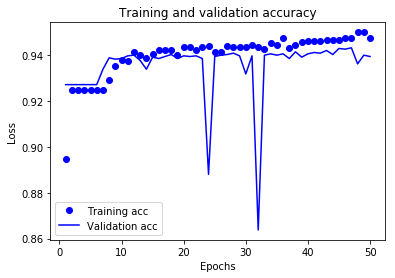

In [13]:
# Plotting the training and validation accuracy
plt.clf()

acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']

epochs6 = range(1, len(acc6) + 1)

plt.plot(epochs6, acc6, 'bo', label='Training acc')
plt.plot(epochs6, val_acc6, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Add more layers with dropout
model7 = models.Sequential()

# 6 hidden layers with 2 dropout layers
model7.add(layers.Dense(96, activation='relu', input_shape=(36,)))
model7.add(layers.Dense(96, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(3, activation='softmax'))

model7.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history7 = model7.fit(df_train_x,
                      df_train_y_rescale,
                      epochs=50,
                      batch_size=128,
                      validation_data=(df_test_x, df_test_y_rescale))

Train on 3772 samples, validate on 3428 samples
Epoch 1/50


 128/3772 [>.............................] - ETA: 15s - loss: 1.1785 - acc: 0.1953

1536/3772 [===========>..................] - ETA: 0s - loss: 0.7552 - acc: 0.7194 

3072/3772 [=======================>......] - ETA: 0s - loss: 0.5894 - acc: 0.8158

3772/3772 [==============================] - 1s 214us/step - loss: 0.5514 - acc: 0.8359 - val_loss: 0.3012 - val_acc: 0.9271


Epoch 2/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3555 - acc: 0.9297

1024/3772 [=======>......................] - ETA: 0s - loss: 0.3626 - acc: 0.9268

2560/3772 [===================>..........] - ETA: 0s - loss: 0.3695 - acc: 0.9246

3772/3772 [==============================] - 0s 51us/step - loss: 0.3725 - acc: 0.9226 - val_loss: 0.2893 - val_acc: 0.9271


Epoch 3/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2593 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.3800 - acc: 0.9154

3200/3772 [========================>.....] - ETA: 0s - loss: 0.3332 - acc: 0.9272

3772/3772 [==============================] - 0s 48us/step - loss: 0.3386 - acc: 0.9234 - val_loss: 0.2738 - val_acc: 0.9271


Epoch 4/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3377 - acc: 0.9141

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2996 - acc: 0.9342

3200/3772 [========================>.....] - ETA: 0s - loss: 0.3175 - acc: 0.9263

3772/3772 [==============================] - 0s 48us/step - loss: 0.3212 - acc: 0.9247 - val_loss: 0.3119 - val_acc: 0.9271


Epoch 5/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3344 - acc: 0.9062

1536/3772 [===========>..................] - ETA: 0s - loss: 0.3218 - acc: 0.9232

3200/3772 [========================>.....] - ETA: 0s - loss: 0.3164 - acc: 0.9241

3772/3772 [==============================] - 0s 48us/step - loss: 0.3165 - acc: 0.9247 - val_loss: 0.2538 - val_acc: 0.9271


Epoch 6/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2970 - acc: 0.9375

1664/3772 [============>.................] - ETA: 0s - loss: 0.3054 - acc: 0.9195

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2950 - acc: 0.9256

3772/3772 [==============================] - 0s 49us/step - loss: 0.2930 - acc: 0.9247 - val_loss: 0.2479 - val_acc: 0.9271


Epoch 7/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2916 - acc: 0.9297

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2870 - acc: 0.9254

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2810 - acc: 0.9242

3772/3772 [==============================] - 0s 50us/step - loss: 0.2830 - acc: 0.9247 - val_loss: 0.2996 - val_acc: 0.9271


Epoch 8/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3893 - acc: 0.8672

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2783 - acc: 0.9197

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2697 - acc: 0.9215

3772/3772 [==============================] - 0s 51us/step - loss: 0.2662 - acc: 0.9247 - val_loss: 0.2422 - val_acc: 0.9271


Epoch 9/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3530 - acc: 0.8984

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2591 - acc: 0.9264

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2560 - acc: 0.9271

3772/3772 [==============================] - 0s 49us/step - loss: 0.2587 - acc: 0.9247 - val_loss: 0.2301 - val_acc: 0.9271


Epoch 10/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2670 - acc: 0.9141

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2410 - acc: 0.9264

3200/3772 [========================>.....] - ETA: 0s - loss: 0.2410 - acc: 0.9263

3772/3772 [==============================] - 0s 49us/step - loss: 0.2517 - acc: 0.9247 - val_loss: 0.2206 - val_acc: 0.9271


Epoch 11/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3115 - acc: 0.9062

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2510 - acc: 0.9167

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2438 - acc: 0.9215

3772/3772 [==============================] - 0s 48us/step - loss: 0.2365 - acc: 0.9247 - val_loss: 0.2199 - val_acc: 0.9271


Epoch 12/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1659 - acc: 0.9531

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2555 - acc: 0.9219

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2418 - acc: 0.9234

3772/3772 [==============================] - 0s 50us/step - loss: 0.2359 - acc: 0.9247 - val_loss: 0.2336 - val_acc: 0.9271


Epoch 13/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2959 - acc: 0.9219

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2535 - acc: 0.9187

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2432 - acc: 0.9241

3772/3772 [==============================] - 0s 49us/step - loss: 0.2407 - acc: 0.9247 - val_loss: 0.2121 - val_acc: 0.9271


Epoch 14/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2875 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2738 - acc: 0.9105

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2371 - acc: 0.9209

3772/3772 [==============================] - 0s 52us/step - loss: 0.2332 - acc: 0.9247 - val_loss: 0.2127 - val_acc: 0.9271


Epoch 15/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2262 - acc: 0.9141

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2289 - acc: 0.9242

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2247 - acc: 0.9260

3772/3772 [==============================] - 0s 50us/step - loss: 0.2249 - acc: 0.9247 - val_loss: 0.2213 - val_acc: 0.9271


Epoch 16/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1681 - acc: 0.9609

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2602 - acc: 0.9289

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2364 - acc: 0.9244

3772/3772 [==============================] - 0s 51us/step - loss: 0.2302 - acc: 0.9250 - val_loss: 0.2068 - val_acc: 0.9271


Epoch 17/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1696 - acc: 0.9375

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2497 - acc: 0.9169

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2338 - acc: 0.9204

3772/3772 [==============================] - 0s 54us/step - loss: 0.2183 - acc: 0.9263 - val_loss: 0.2485 - val_acc: 0.9271


Epoch 18/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2427 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2108 - acc: 0.9332

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2118 - acc: 0.9332

3772/3772 [==============================] - 0s 53us/step - loss: 0.2178 - acc: 0.9313 - val_loss: 0.2101 - val_acc: 0.9390


Epoch 19/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1883 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2205 - acc: 0.9347

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2223 - acc: 0.9353

3772/3772 [==============================] - 0s 52us/step - loss: 0.2205 - acc: 0.9372 - val_loss: 0.2050 - val_acc: 0.9393


Epoch 20/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1926 - acc: 0.9453

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2010 - acc: 0.9467

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2032 - acc: 0.9418

3772/3772 [==============================] - 0s 50us/step - loss: 0.2071 - acc: 0.9401 - val_loss: 0.2318 - val_acc: 0.9335


Epoch 21/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1849 - acc: 0.9609

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2055 - acc: 0.9461

2688/3772 [====================>.........] - ETA: 0s - loss: 0.2200 - acc: 0.9371

3772/3772 [==============================] - 0s 52us/step - loss: 0.2117 - acc: 0.9406 - val_loss: 0.2079 - val_acc: 0.9361


Epoch 22/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1249 - acc: 0.9688

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1930 - acc: 0.9447

2944/3772 [======================>.......] - ETA: 0s - loss: 0.2041 - acc: 0.9433

3772/3772 [==============================] - 0s 50us/step - loss: 0.2071 - acc: 0.9430 - val_loss: 0.2345 - val_acc: 0.9314


Epoch 23/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2055 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2436 - acc: 0.9375

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2121 - acc: 0.9430

3772/3772 [==============================] - 0s 50us/step - loss: 0.2109 - acc: 0.9427 - val_loss: 0.2137 - val_acc: 0.9402


Epoch 24/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1844 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1996 - acc: 0.9447

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2156 - acc: 0.9417

3772/3772 [==============================] - 0s 49us/step - loss: 0.2062 - acc: 0.9425 - val_loss: 0.1925 - val_acc: 0.9399


Epoch 25/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1989 - acc: 0.9609

1152/3772 [========>.....................] - ETA: 0s - loss: 0.2411 - acc: 0.9297

2560/3772 [===================>..........] - ETA: 0s - loss: 0.2111 - acc: 0.9367

3772/3772 [==============================] - 0s 53us/step - loss: 0.2051 - acc: 0.9409 - val_loss: 0.1942 - val_acc: 0.9393


Epoch 26/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2009 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.2136 - acc: 0.9414

2816/3772 [=====================>........] - ETA: 0s - loss: 0.2102 - acc: 0.9382

3772/3772 [==============================] - 0s 53us/step - loss: 0.2005 - acc: 0.9435 - val_loss: 0.1988 - val_acc: 0.9405


Epoch 27/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1403 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2017 - acc: 0.9414

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1888 - acc: 0.9457

3772/3772 [==============================] - 0s 51us/step - loss: 0.1961 - acc: 0.9422 - val_loss: 0.1965 - val_acc: 0.9393


Epoch 28/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2340 - acc: 0.9297

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2034 - acc: 0.9339

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1892 - acc: 0.9426

3772/3772 [==============================] - 0s 50us/step - loss: 0.1895 - acc: 0.9438 - val_loss: 0.3952 - val_acc: 0.8784


Epoch 29/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.3708 - acc: 0.8828

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2194 - acc: 0.9332

3072/3772 [=======================>......] - ETA: 0s - loss: 0.2080 - acc: 0.9385

3772/3772 [==============================] - 0s 49us/step - loss: 0.1991 - acc: 0.9422 - val_loss: 0.2206 - val_acc: 0.9402


Epoch 30/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1896 - acc: 0.9375

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1898 - acc: 0.9445

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1860 - acc: 0.9478

3772/3772 [==============================] - 0s 53us/step - loss: 0.1977 - acc: 0.9430 - val_loss: 0.1963 - val_acc: 0.9405


Epoch 31/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1157 - acc: 0.9688

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1838 - acc: 0.9432

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1838 - acc: 0.9440

3772/3772 [==============================] - 0s 50us/step - loss: 0.1913 - acc: 0.9435 - val_loss: 0.3226 - val_acc: 0.9183


Epoch 32/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2653 - acc: 0.9297

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1988 - acc: 0.9391

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1996 - acc: 0.9408

3772/3772 [==============================] - 0s 51us/step - loss: 0.1940 - acc: 0.9435 - val_loss: 0.2007 - val_acc: 0.9405


Epoch 33/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1756 - acc: 0.9453

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1729 - acc: 0.9516

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1843 - acc: 0.9457

3772/3772 [==============================] - 0s 50us/step - loss: 0.1838 - acc: 0.9443 - val_loss: 0.1985 - val_acc: 0.9382


Epoch 34/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2928 - acc: 0.8750

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2000 - acc: 0.9354

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1898 - acc: 0.9437

3772/3772 [==============================] - 0s 50us/step - loss: 0.1965 - acc: 0.9417 - val_loss: 0.1900 - val_acc: 0.9405


Epoch 35/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1566 - acc: 0.9609

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1895 - acc: 0.9460

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1883 - acc: 0.9430

3772/3772 [==============================] - 0s 50us/step - loss: 0.1868 - acc: 0.9438 - val_loss: 0.2083 - val_acc: 0.9411


Epoch 36/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.0412 - acc: 0.9922

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1755 - acc: 0.9461

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1845 - acc: 0.9442

3772/3772 [==============================] - 0s 52us/step - loss: 0.1866 - acc: 0.9446 - val_loss: 0.1948 - val_acc: 0.9405


Epoch 37/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1625 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.2018 - acc: 0.9427

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1888 - acc: 0.9443

3772/3772 [==============================] - 0s 50us/step - loss: 0.1910 - acc: 0.9435 - val_loss: 0.2217 - val_acc: 0.9396


Epoch 38/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2532 - acc: 0.9219

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1788 - acc: 0.9425

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1764 - acc: 0.9467

3772/3772 [==============================] - 0s 51us/step - loss: 0.1815 - acc: 0.9433 - val_loss: 0.1940 - val_acc: 0.9411


Epoch 39/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.3191 - acc: 0.9062

1152/3772 [========>.....................] - ETA: 0s - loss: 0.1733 - acc: 0.9479

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1866 - acc: 0.9437

3772/3772 [==============================] - 0s 53us/step - loss: 0.1852 - acc: 0.9435 - val_loss: 0.2311 - val_acc: 0.9402


Epoch 40/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1751 - acc: 0.9531

1408/3772 [==========>...................] - ETA: 0s - loss: 0.2107 - acc: 0.9368

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1852 - acc: 0.9446

3772/3772 [==============================] - 0s 52us/step - loss: 0.1828 - acc: 0.9443 - val_loss: 0.2071 - val_acc: 0.9399


Epoch 41/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2736 - acc: 0.9219

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1677 - acc: 0.9479

3072/3772 [=======================>......] - ETA: 0s - loss: 0.1789 - acc: 0.9447

3772/3772 [==============================] - 0s 51us/step - loss: 0.1814 - acc: 0.9438 - val_loss: 0.2077 - val_acc: 0.9399


Epoch 42/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1409 - acc: 0.9609

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1913 - acc: 0.9383

2688/3772 [====================>.........] - ETA: 0s - loss: 0.1924 - acc: 0.9401

3772/3772 [==============================] - 0s 51us/step - loss: 0.1871 - acc: 0.9438 - val_loss: 0.1945 - val_acc: 0.9402


Epoch 43/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2076 - acc: 0.9219

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1806 - acc: 0.9447

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1768 - acc: 0.9463

3772/3772 [==============================] - 0s 52us/step - loss: 0.1816 - acc: 0.9451 - val_loss: 0.2223 - val_acc: 0.9408


Epoch 44/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1885 - acc: 0.9688

1280/3772 [=========>....................] - ETA: 0s - loss: 0.1667 - acc: 0.9508

2560/3772 [===================>..........] - ETA: 0s - loss: 0.1784 - acc: 0.9457

3772/3772 [==============================] - 0s 53us/step - loss: 0.1817 - acc: 0.9449 - val_loss: 0.1953 - val_acc: 0.9408


Epoch 45/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1058 - acc: 0.9609

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1987 - acc: 0.9355

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1760 - acc: 0.9442

3772/3772 [==============================] - 0s 53us/step - loss: 0.1728 - acc: 0.9451 - val_loss: 0.2061 - val_acc: 0.9414


Epoch 46/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.1985 - acc: 0.9453



1408/3772 [==========>...................] - ETA: 0s - loss: 0.1826 - acc: 0.9460

2304/3772 [=================>............] - ETA: 0s - loss: 0.1907 - acc: 0.9405

3772/3772 [==============================] - 0s 55us/step - loss: 0.1797 - acc: 0.9433 - val_loss: 0.2461 - val_acc: 0.9408


Epoch 47/50


 128/3772 [>.............................] - ETA: 0s - loss: 0.2242 - acc: 0.9375

1408/3772 [==========>...................] - ETA: 0s - loss: 0.1666 - acc: 0.9482

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1791 - acc: 0.9446

3772/3772 [==============================] - 0s 49us/step - loss: 0.1771 - acc: 0.9446 - val_loss: 0.2540 - val_acc: 0.9390


Epoch 48/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1992 - acc: 0.9531

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1853 - acc: 0.9440

3200/3772 [========================>.....] - ETA: 0s - loss: 0.1681 - acc: 0.9481

3772/3772 [==============================] - 0s 47us/step - loss: 0.1768 - acc: 0.9443 - val_loss: 0.1898 - val_acc: 0.9402


Epoch 49/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.2045 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1786 - acc: 0.9460

2816/3772 [=====================>........] - ETA: 0s - loss: 0.1721 - acc: 0.9485

3772/3772 [==============================] - 0s 50us/step - loss: 0.1781 - acc: 0.9433 - val_loss: 0.2277 - val_acc: 0.9390


Epoch 50/50
 128/3772 [>.............................] - ETA: 0s - loss: 0.1652 - acc: 0.9453

1536/3772 [===========>..................] - ETA: 0s - loss: 0.1570 - acc: 0.9466

2944/3772 [======================>.......] - ETA: 0s - loss: 0.1684 - acc: 0.9457

3772/3772 [==============================] - 0s 49us/step - loss: 0.1678 - acc: 0.9451 - val_loss: 0.1920 - val_acc: 0.9417


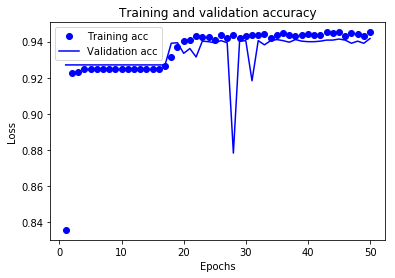

In [17]:
# Plotting the training and validation accuracy
plt.clf()

acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']

epochs7 = range(1, len(acc7) + 1)

plt.plot(epochs7, acc7, 'bo', label='Training acc')
plt.plot(epochs7, val_acc7, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
y_pred7 = model7.predict_classes(df_test_x)
y_pred7 += 1

confusion_matrix7 = ConfusionMatrix(df_test_y, y_pred7)

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


In [26]:
confusion_matrix7.print_stats()

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted   1  2     3  __all__
Actual                         
1          58  0    15       73
2           5  0   172      177
3           8  0  3170     3178
__all__    71  0  3357     3428


Overall Statistics:

Accuracy: 0.941656942823804
95% CI: (0.9332805070199566, 0.9492697069903637)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999999
Kappa: 0.36368572237355606
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         1          2           3
Population                                   3428       3428        3428
P: Condition positive                          73        177        3178
N: Condition negative                        3355       3251         250
Test outcome positive                          71          0        3357
Test outcome negative                        3357       3428          71
TP: True Positive                              58          0        3170
TN: True Negative                  

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)
